<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/XGBOOST_ML/blob/main/XGBOOST_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#XGBOOST REGRESSOR:

DATASET : INSURANCE PRICE PREDICTION

**Task:**

Number of features are 6 based on which we have predict the insurance Price

**Column discription**
- age
- sex
- bmi
- children
- smoker
- region
- charges

In [ ]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [ ]:
## reading csv file as dataframe "Data"
data = pd.read_csv("/content/insurance.csv")
data.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
## Infomation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
## checking the null values:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
## duplicated values:
print(data.shape)
print(f"total duplicate values : {data.duplicated().sum()}")
data[data.duplicated()]

(1338, 7)
total duplicate values : 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
## removing duplicate
data.drop_duplicates(inplace = True)
print(data.shape)

(1337, 7)


In [ ]:
## converting all if contain any string in between  into numerical:

for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        numerical_conversion = np.round(data[i],1)
        data[i] = numerical_conversion.copy()

In [ ]:

print("data_info ",data.info())
print("Data_Shape ",data.shape )
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
data_info  None
Data_Shape  (1337, 7)


,age,sex,bmi,children,smoker,region,charges
229,47,male,25.5,2,no,northeast,9225.3
1267,24,male,31.1,0,yes,northeast,34254.1


In [ ]:
## split data into features and target
x = data.drop("charges", axis=1)
y = data.charges

print(f"the shape of feature dataframe : {x.shape}")
print(f"the shape of target dataframe : {y.shape}")


the shape of feature dataframe : (1337, 6)
the shape of target dataframe : (1337,)


In [ ]:
## crating x_numerical and x_categorical frame
x_numerical = []
x_categorical = []

for i in x.columns:
    if pd.api.types.is_numeric_dtype(x[i]):
        x_numerical.append(i)
    else:
        x_categorical.append(i)


### Lets Explore the data:

In [69]:
## dataframe description:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
bmi,1337.0,30.663351,6.100539,16.0,26.3,30.4,34.7,53.1
children,1337.0,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
charges,1337.0,13279.121541,12110.359815,1121.9,4746.3,9386.2,16657.7,63770.4


In [68]:
sns.heatmap(data.corr()

<ipython-input-68-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109399,0.041536,0.298308
bmi,0.109399,1.000000,0.012721,0.198599
children,0.041536,0.012721,1.000000,0.067389
charges,0.298308,0.198599,0.067389,1.000000


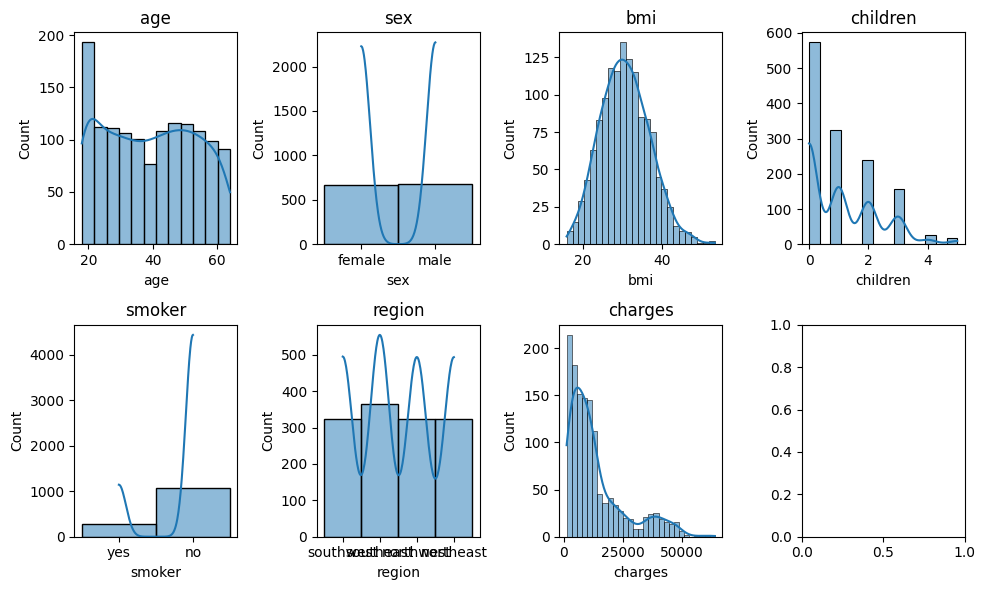

In [ ]:
## ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

i:0, col:age
i:1, col:bmi
i:2, col:children


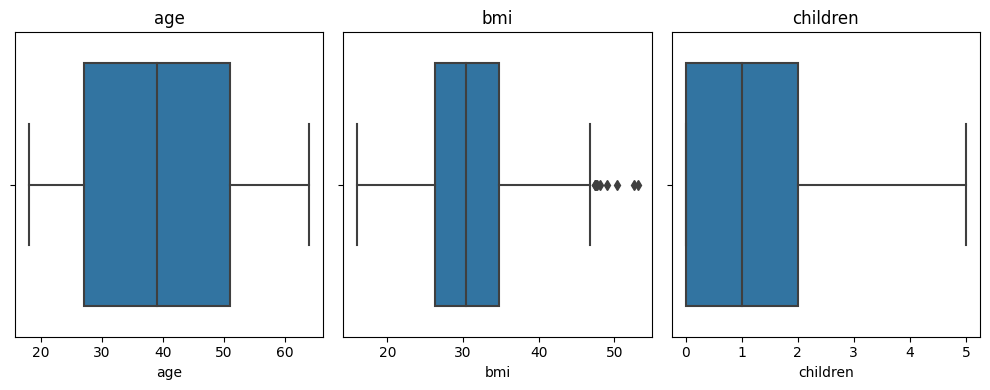

In [ ]:
## ploting boxplot
num_rows = 1
num_cols = 3

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x[x_numerical]):
    print(f"i:{i}, col:{col}")
    sns.boxplot(data = x,x = col ,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:

## importing OneHot from sklearn lib:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

# transforming categorical features into numerical binary:
encode = OHE.fit_transform(x[x_categorical])
print("encode shape:",encode.shape)

# Convert the result to a DataFrame
encode_categories = pd.DataFrame(encode.toarray(), columns = OHE.get_feature_names_out(x_categorical))
print("encode_categories shape:",encode_categories.shape)

# Reset the index of encode_categories and data_num_frame
encode_categories = encode_categories.reset_index(drop=True)
data_numerical_frame = x[x_numerical].reset_index(drop=True)

# Concatenate the one-hot encoded categorical columns with the numerical columns
x_encode = pd.concat([encode_categories, data_numerical_frame], axis=1)
print("x_encode shape:",x_encode.shape)



encode shape: (1337, 8)
encode_categories shape: (1337, 8)
x_encode shape: (1337, 11)


In [ ]:
## train test split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encode,y, test_size = 0.2, random_state = 42)
print("shape of x_train{} and have dimension:{}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension:{}".format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension:{}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(1069, 11) and have dimension:2
shape of y_train(1069,) and have dimension:1
shape of x_test(268, 11)  and have dimension:2
shape of y_test(268,) and have dimension: 2


In [ ]:
import xgboost as XGB

## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# Initialize the XGBoost regressor
def xgb_base(booster):
    xgb_reg = XGB.XGBRegressor(booster = booster)

    # Train the regressor
    xgb_model = xgb_reg.fit(x_train, y_train)

    # Predict the target variable on the test set
    y_preds = xgb_model.predict(x_test)


    ## performance matric mean square error:
    mean_sq_error = mse(y_test,y_preds)
    print(f"mean_square_error : {mean_sq_error}")


    ## Root mean squared error:
    rmse = np.sqrt(mean_sq_error)
    print(f"Root_mean_squared_error:{np.round(rmse,1)}")


    ## performance matric mean absolute error:
    mean_abs_error = mae(y_test,y_preds)
    rounded_mae = round(mean_abs_error, 1)
    print(f"mean_absolute_error : {rounded_mae}")

    # Calculate R-squared
    r_squared = r2_score(y_test, y_preds)

    # Calculate Adjusted R-squared
    p = 6
    n=len(y_test)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

    print(f"R-squared: {r_squared}")
    print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")

    return y_preds


In [ ]:
## compairing the prediction with truth values:
"""
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

def prediction_tab(y_test, y_pred):

    prediction_result = []
    Squared_difference = []
    absolute_difference = []
    j=0
    for i in y_test:
        diff = i - y_pred[j]
        prediction_result.append(int(diff))
        j = j+1

    for i in prediction_result:
        mse = i*i
        Squared_difference.append(mse)
        absolute_difference.append(abs(i))

    prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : (np.round(y_pred,0)) , "(Actual-preds)" : prediction_result, "Squared_difference":np.round(Squared_difference,2), 'absolute_difference': absolute_difference })
    return prediction_table.sample(10)

---
In the XGBoost library, the booster parameter allows us to choose the type of base learner or model that will be used in the ensemble.

**The booster parameter accepts one of the following values:**

1. gbtree: This is the default option. It indicates that the base learner will be a decision tree.

2. gblinear: This indicates that the base learner will be a linear model.

3. dart: This stands for "Dropout Additive Regression Trees".
 - It's an advanced boosting algorithm that combines aspects of both gradient boosting and dropout regularization.

Choosing the appropriate booster depends on specific dataset and problem.

**NOTE:**

In most cases, the default gbtree booster (decision tree) works well and is widely used. If you have a preference for linear models or want to experiment with more advanced techniques, we can choose gblinear.

---

In [ ]:
## predictions: #gbtree/gblinear/dart
y_pred_gbt = xgb_base('gbtree')


mean_square_error : 24831394.471616793
Root_mean_squared_error:4983.1
mean_absolute_error : 2872.3
R-squared: 0.8648675910149861
Adjusted R-squared: 0.86


In [ ]:
## predictions: #gbtree/gblinear/dart
y_pred_gblinear = xgb_base('gblinear')


mean_square_error : 36171011.9945507
Root_mean_squared_error:6014.2
mean_absolute_error : 4110.0
R-squared: 0.8031574105982452
Adjusted R-squared: 0.8


In [ ]:
## predictions: #gbtree/gblinear/dart
y_pred_dart = xgb_base('dart')


mean_square_error : 24831394.471616793
Root_mean_squared_error:4983.1
mean_absolute_error : 2872.3
R-squared: 0.8648675910149861
Adjusted R-squared: 0.86


In [ ]:
## prediction table :
prediction_tab(y_test, y_pred_dart)

,Actual,Predict,(Actual-preds),Squared_difference,absolute_difference
1043,3161.5,3210.0,-48,2304,48
1322,12981.3,16501.0,-3520,12390400,3520
1111,41949.2,41446.0,503,253009,503
728,2217.6,4806.0,-2588,6697744,2588
875,2690.1,5335.0,-2644,6990736,2644
1332,11411.7,11224.0,187,34969,187
240,38511.6,39937.0,-1425,2030625,1425
965,4746.3,8653.0,-3906,15256836,3906
793,21195.8,21316.0,-119,14161,119
639,12949.2,13809.0,-859,737881,859


---
---